# DM2 Statistiques


On importe les librairies nécessaires : 

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors.kde import KernelDensity
import sklearn.linear_model as lm
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from scipy.stats import gaussian_kde
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import t

import scipy
import statistics
import random


## Exercice 1 : 

### Question 1 : 

true mean : 
0.2857142857142857


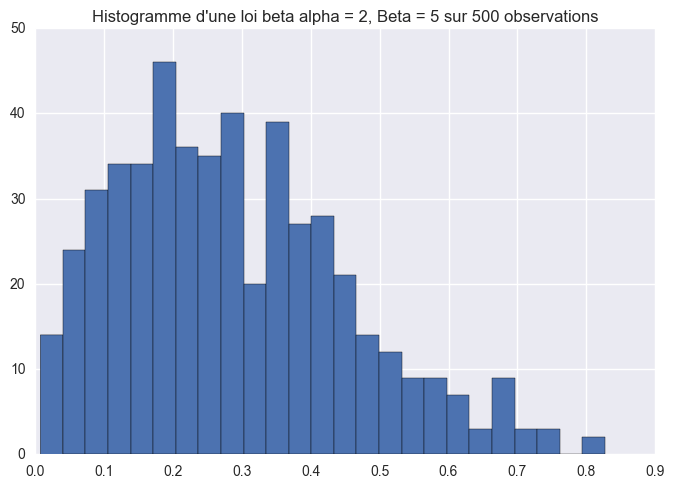

In [3]:
np.random.seed(2)
X = np.random.beta(2, 5, 500)

plt.figure(1)
pylab.hist(X, bins=25)

true_mean = 2 / (2 + 5)
print("true mean : ")
print(true_mean)
plt.title("Histogramme d'une loi beta alpha = 2, Beta = 5 sur 500 observations")
plt.show()

### Question 2

In [4]:
X2 = np.zeros([2, 500])
n=500
for i in range (2):
    X2[i]= (np.random.beta(2, 5, 500))
    
X2Mean1 = X2[0].mean()
X2Mean2 = X2[1].mean()
print("moyenne de X1 : ")
print(X2Mean1)
print("moyenne de X2 : ")
print(X2Mean2)

moyenne de X1 : 
0.291322652055
moyenne de X2 : 
0.278973580262


### Question 3 : 

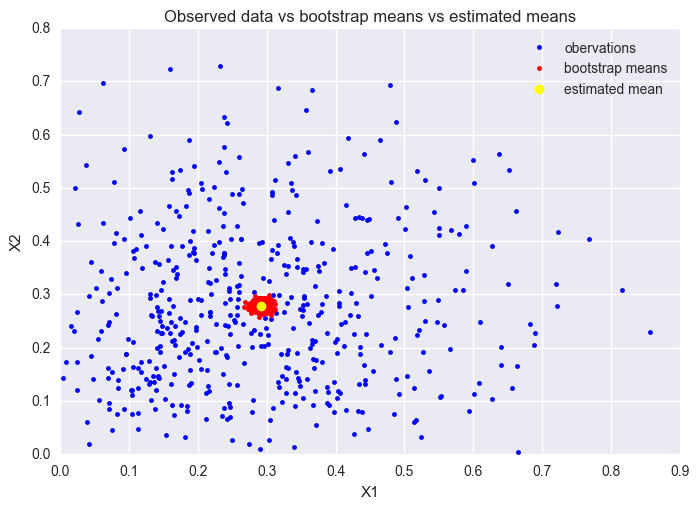

In [10]:
B = 500
Xstarbarmem = np.zeros([2, B])

for i in range(B):
    Xstar = X2[:,np.random.randint(500, size=500)]
    Xstarbarmem[:, i] = np.mean(Xstar,1)

plt.figure(2)

plt.plot(X2[0], X2[1], '.', color='blue', label='obervations')
plt.plot(Xstarbarmem[0,:], Xstarbarmem[1,:], '.', color='red', label='bootstrap means')
plt.plot(X2Mean1, X2Mean2, 'o', color='yellow', label='estimated mean')
plt.legend()
plt.title("Observed data vs bootstrap means vs estimated means")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()



### Question 4 : 

#### Biais et variance Bootstrap : 

In [13]:
bootVar = np.zeros([2,2])
test1 =  np.zeros([2,500])
print("biais bootstrap X1, X2")
print(sum(Xstarbarmem[0] - X2Mean1)/B, sum(Xstarbarmem[1]- X2Mean2)/B)

print()
for k in range(2):
    test1[k] = (Xstarbarmem[k] - Xstarbarmem[k].mean())
    
bootVar = (np.dot(test1/B, np.transpose(test1)))   
print("variance bootstrap")
print(bootVar)

biais bootstrap X1, X2
7.78011203899e-05 -0.000186433545891

variance bootstrap
[[  5.11821404e-05   3.29127966e-06]
 [  3.29127966e-06   4.60737418e-05]]


#### Biais et variance Jackknife :

In [14]:
idx = np.arange(n)
jackBias = np.zeros([2, 2])

jackVar = np.zeros([2, 2])
temp = np.zeros([2, 500])
temp2 = np.zeros([2, 500])


jackBias = np.sum(X2[:,idx!=i].mean()-X2[:].mean() for i in range(n) )
print("Bias Jack")
print(np.sum(X2[0,idx!=i].mean()-X2[0].mean() for i in range(n) )*(n-1)/n)
print(np.sum(X2[1,idx!=i].mean()-X2[1].mean() for i in range(n) )*(n-1)/n)
print()
for k in range(2):
    test = (1/n)*np.sum(X2[k,idx!=j].mean() for j in range(n))
    temp[k] = [X2[k,idx!=j].mean() for j in range(n)]
    temp2[k] = test - temp[k]

jackVar = (np.dot(temp2*(n-1)/n, np.transpose(temp2)))
print ("Var jack :")
print(jackVar)
print()
print("On calcule var(X)/n et on trouve : ")
print(np.cov(X2)/n)

Bias Jack
-1.99440464144e-14
-3.10240722001e-15

Var jack :
[[  5.27690164e-05   2.63047588e-06]
 [  2.63047588e-06   4.37100592e-05]]

On calcule var(X)/n et on trouve : 
[[  5.27690164e-05   2.63047588e-06]
 [  2.63047588e-06   4.37100592e-05]]


### Question 5 : 

In [15]:
varTheo = np.zeros([2, 2])

varTheo[0,0] = 10/(7**2*8)
varTheo[1,1] = 10/(7**2*8)
print("variance théorique : ")
print(varTheo)
print()

print("Distance Bootstrap : ")
print(abs(varTheo[0,0] - bootVar[0,0]) + abs(varTheo[0,1] - bootVar[0,1]) + \
      abs(varTheo[1,1] - bootVar[1,1]))

print("Distance Jackknife: ")
print(abs(varTheo[0,0] - jackVar[0,0]) + abs(varTheo[0,1] - jackVar[0,1]) + \
      abs(varTheo[1,1] - jackVar[1,1]))

variance théorique : 
[[ 0.0255102  0.       ]
 [ 0.         0.0255102]]

Distance Bootstrap : 
0.0509264435606
Distance Jackknife: 
0.0509265595635


## Exercice 2 

### Question 6 : 

In [86]:
N = 300
X2 = np.zeros([1, N])
X1 = np.zeros([1, N])
U = np.zeros([1, N])

X1[:] = [random.uniform(0,1) for i in range(300)]
U[:] = [random.uniform(-0.1,0.1) for i in range(300)]
X2[:] = X1 + U




### Question 7 : 

In [20]:
corr_empir = np.corrcoef(X1,X2)[(0,1)]
corr_theo = (1/12)/((np.sqrt(1/12)*np.sqrt(1/12 + 1/300)))
print("Correlation empirique : "+str(corr_empir))
print("Correlation théorique : "+str(corr_theo))

Correlation empirique : 0.980929127894
Correlation théorique : 0.980580675691


### Question 8 :

In [58]:
def intervalleBootstrap(X1, U, corr_empir, NN):
    B = 500
    X12corrcoef = np.zeros([1, B])
    X2star = np.zeros([1, NN])
    Ustar = np.zeros([1, NN])
    X1star = np.zeros([1, NN])

    for i in range(B):
        X1star[:] = X1[:,np.random.randint(NN, size=NN)]
        Ustar[:] = U[:,np.random.randint(NN, size=NN)]
        X2star[:] = X1star + Ustar
        X12corrcoef[:, i] = np.corrcoef(X1star,X2star)[(1,0)]

    ksi = np.sqrt(NN)*(X12corrcoef[:] - corr_empir)
    lim1 = corr_empir - np.percentile(ksi, 97.5)/np.sqrt(NN)
    lim2 = corr_empir - np.percentile(ksi, 2.5)/np.sqrt(NN)
    return(lim1,lim2,X12corrcoef)

print("Intervalle de confiance basic bootsrap : ["+str(intervalleBootstrap(X1, U, corr_empir,300)[0])+","+str(intervalleBootstrap(X1, U, corr_empir,300)[1])+"]")


Intervalle de confiance basic bootsrap : [0.97800179959,0.983807722054]


### Question 9 : 

In [59]:
def intervallePercentile(X12corrcoef):
    lim2 = np.percentile(X12corrcoef, 97.5)
    lim1 = np.percentile(X12corrcoef, 2.5)
    return(lim1,lim2)

print("Intervalle de confiance percentile bootsrap : ["+\
      str(intervallePercentile(intervalleBootstrap(X1, U, corr_empir,300)[2]))+"]")


Intervalle de confiance percentile bootsrap : [(0.9780958994194433, 0.98379624325410309)]


### Question 10 : 

In [97]:

def intervalleJack(X1,X2, corr_empir, NN):
    
    idx1 = np.arange(NN)

    coeff_jack = [np.corrcoef(X1[:,idx1!=j],X2[:,idx1!=j])[(1,0)] for j in range(NN)]
    ksiJack = [np.sqrt(NN)*(i - corr_empir) for i in coeff_jack]
    
    ksiJacknp = np.asarray(ksiJack)

    jackVar = (NN-1) * np.cov(ksiJacknp,bias=True)
    
    lim1 = corr_empir - scipy.stats.norm.ppf(0.975)*np.sqrt(jackVar)/np.sqrt(NN)
    lim2 = corr_empir - scipy.stats.norm.ppf(0.025)*np.sqrt(jackVar)/np.sqrt(NN)
    return (lim1,lim2)

print("Intervalle de confiance asymptotique : ["+str(intervalleJack(X1,X2, corr_empir,30))+"]")


Intervalle de confiance asymptotique : [(0.9664858171317886, 0.99537243865673553)]


C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 300 but corresponding boolean dimension is 30


### Question 11 :

In [98]:

def coverageProb(M, NN):
    X2cov = np.zeros([1, NN])
    X1cov = np.zeros([1, NN])
    Ucov = np.zeros([1, NN])
    jack = 0
    basic = 0
    perc = 0
    for i in range (M) :
        X1cov[:] = [random.uniform(0,1) for j in range(NN)]
        Ucov[:] = [random.uniform(-0.1,0.1) for j in range(NN)]
        X2cov[:] = X1cov + Ucov
        corr_coeffMC = np.corrcoef(X1cov,X2cov)[1,0]

        jackInt = intervalleJack(X1cov,X2cov, corr_coeffMC, NN)
        if ((corr_theo > jackInt[0]) and 
        (corr_theo < jackInt[1])):
            jack+=1

        basicInt = intervalleBootstrap(X1cov, Ucov,corr_coeffMC, NN)
        if ((corr_theo > basicInt[0] and 
            corr_theo < basicInt[1])):
            basic+=1

        percInt = intervallePercentile(basicInt[2])
        if ((corr_theo > percInt[0] and \
            corr_theo < percInt[1])):
            perc+=1
    return(perc*100/float(M),jack*100/float(M),basic*100/float(M))

covProb2000 = coverageProb(2000,300)
print("probas pour M = 2000 :")
print("asympt : "+ str(covProb2000[1]))
print("perc : "+ str(covProb2000[0]))
print("basic : "+ str(covProb2000[2]))


probas pour M = 2000 :
asympt : 95.0
perc : 95.0
basic : 95.0


### Question 12 :

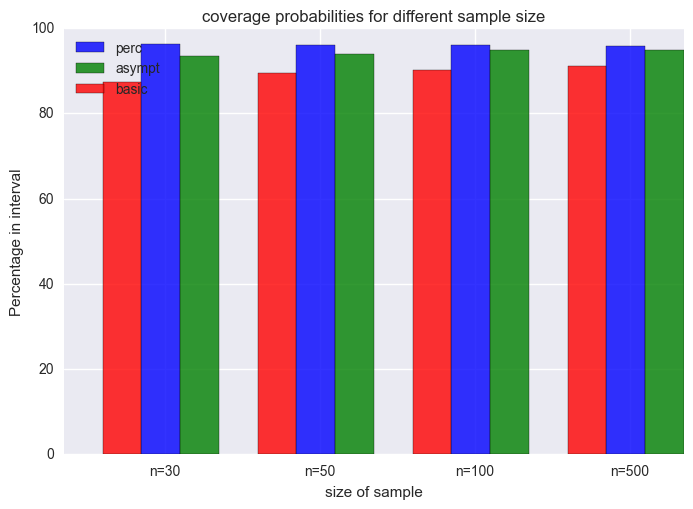

In [108]:
cov30 = coverageProb(3000,30)
cov50 = coverageProb(3000,50)
cov100 = coverageProb(3000,100)
cov500 = coverageProb(3000,500)


x = ("n=30", "n=50", "n=100", "n=500")
n_groups = 4
ind = np.arange(4)  # the x locations for the groups
width = 0.15   

perc = (cov30[0], cov50[0], cov100[0], cov500[0])
jack = (cov30[1], cov50[1], cov100[1], cov500[1])
basic = (cov30[2], cov50[2], cov100[2], cov500[2])

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(index, perc, bar_width,
                 alpha=opacity,
                 color='b',
                 label='perc')

rects1 = ax.bar(index + bar_width, jack, bar_width,
                 alpha=opacity,
                 color='g',
                 label='asympt')

rects1 = ax.bar(index - bar_width, basic, bar_width,
                 alpha=opacity,
                 color='r',
                 label='basic')
ax.set_xticks(ind + width)
ax.set_xticklabels(x) 
plt.xlabel('size of sample')
plt.ylabel('Percentage in interval')
plt.title('coverage probabilities for diﬀerent sample size')
plt.legend(loc="best",fancybox=True)
plt.show()

## Exercice 3


On importe nos data : 

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",  \
                 delim_whitespace=True, \
                 names=["mpg","cylinders","displacement","horsepower", "weight", "acceleration", "model year", "origin", "car name"])

#"NaN" est utilisé pour les données manquantes
df = df[np.isfinite(df["mpg"])]
df = df[np.isfinite(df["horsepower"])]

new_index = (np.arange(len(df["origin"])))
df = df.set_index(new_index)

del df["origin"]
del df["car name"]

print(df.head(3))

    mpg  cylinders  displacement  horsepower  weight  acceleration  model year
0  18.0        8.0         307.0       130.0  3504.0          12.0        70.0
1  15.0        8.0         350.0       165.0  3693.0          11.5        70.0
2  18.0        8.0         318.0       150.0  3436.0          11.0        70.0


### Question 13 : 

C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


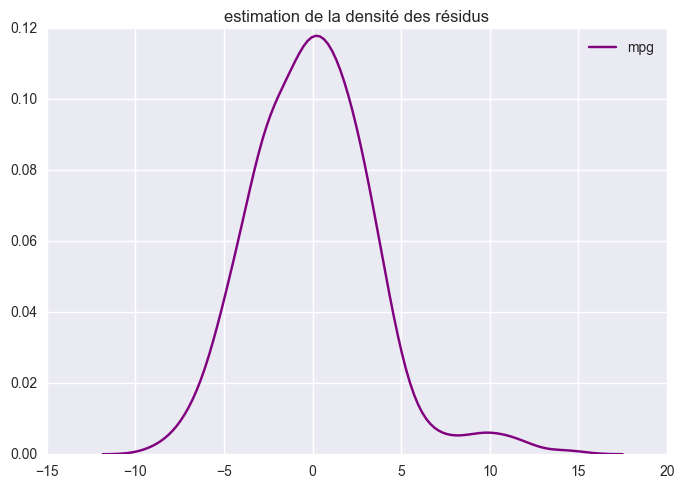

In [4]:
model1 = lm.LinearRegression(fit_intercept=True)
Xmpg = df[["cylinders","displacement","horsepower", "weight", "acceleration", "model year"]]
Ympg = df["mpg"]

model1.fit(Xmpg,Ympg)

theta = (model1.coef_)
theta0 = model1.intercept_

res1 =  Ympg - model1.predict(Xmpg)
plt.figure(3)
sns.kdeplot(res1, color="purple")
plt.title("estimation de la densité des résidus")
plt.show()

### Question 14 : 

In [5]:
theta0 = theta[0]
def intervalleCoef(coef) : 

    XTX1 = np.sqrt(np.linalg.inv(Xmpg.transpose().dot(Xmpg))[coef][coef])
    
    nn = len(Xmpg[Xmpg.columns[coef]])
    sigma2 = np.linalg.norm(res1,2)**2/(nn - 6)

    lim1 = theta[coef] - t.ppf(0.975, nn - 6)* np.sqrt(sigma2) * XTX1
    lim2 = theta[coef] + t.ppf(0.975, nn - 6)* np.sqrt(sigma2) * XTX1
    return (lim1, lim2)


print("theta"+str(1)+" : "+ str(theta[0]))
print("Intervalle de confiance pour theta1 : "+"["+str(intervalleCoef(0))+"]")


theta1 : -0.329859089074
Intervalle de confiance pour theta1 : [(-0.97006549905144579, 0.31034732090353578)]


### Question 15 : 


In [6]:
BB = 500
nn = len(Xmpg["cylinders"])
bootstrapRes = np.zeros([BB,nn])
yBootstrap = np.zeros([BB,nn])

modelBoot = lm.LinearRegression(fit_intercept=True)

modelBoot = model1

for i in range(BB): 
    r = (Ympg-modelBoot.predict(Xmpg))
    bootstrapRes[i] = r[np.random.randint(nn, size=nn)]
    
    yBootstrap[i] = model1.predict(Xmpg) - res1 + bootstrapRes[i]
    
    modelBootBest = lm.LinearRegression(fit_intercept=True)
    modelBootBest.fit(Xmpg, yBootstrap[i])
    
    modelBoot = modelBootBest
    
    

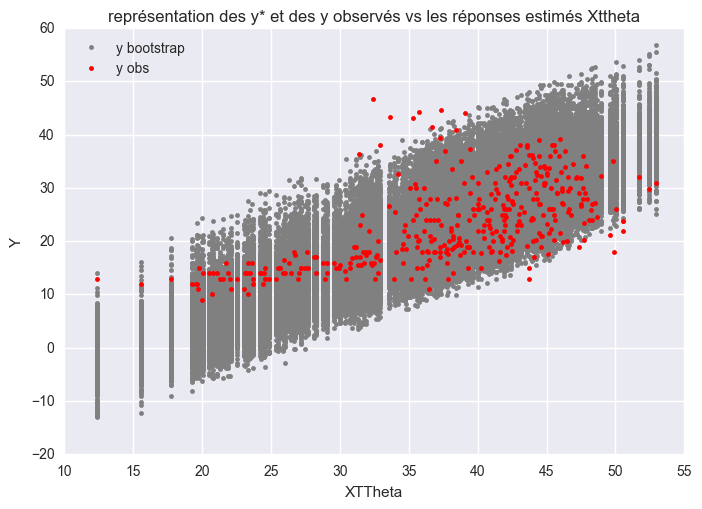

In [16]:
plt.figure(5)

for i in range(BB-1):
    plt.plot(model1.predict(Xmpg) - model1.intercept_ - res1, yBootstrap[i], '.', color="grey")
    
# Ybootmean = [yBootstrap[:,i].mean() for i in range(nn)]
# plt.plot(model1.predict(Xmpg)- res1, Ybootmean, '.', color="b")

plt.plot(model1.predict(Xmpg) - model1.intercept_ - res1, yBootstrap[BB-1], '.', color="grey", label="y bootstrap")
plt.plot(model1.predict(Xmpg) - model1.intercept_ - res1, Ympg, '.', color="r", label="y obs")

plt.xlabel("XTTheta")
plt.ylabel("Y")
plt.title("représentation des y* et des y observés vs les réponses estimés Xttheta")
plt.legend(loc ="best" )
plt.show()


### Question 16

In [8]:
BBB = 500
def intervalleBootCoef(coef):
    dfstar = np.zeros([7, nn])
    coefboot = np.zeros([1, BBB])
    for i in range(BBB):
        dfstar = df.loc[np.random.randint(nn, size=nn)]
        modelBoot = lm.LinearRegression(fit_intercept=True)
        
        Xstar = dfstar[["cylinders","displacement","horsepower", "weight", "acceleration", "model year"]]
        Ystar = dfstar["mpg"]
        
        modelBoot.fit(Xstar, Ystar)
        coefboot[:,i] = modelBoot.coef_[coef]

    ksi3 = np.sqrt(nn)*(coefboot[:] - theta[coef])
    lim116 = theta[coef] - np.percentile(ksi3, 97.5)/np.sqrt(nn)
    lim216 = theta[coef] - np.percentile(ksi3, 2.5)/np.sqrt(nn)

    return (lim116,lim216)

print("theta"+str(1)+" : "+ str(theta[0]))

print("Intervalle de confiance Bootrstrap pour theta1 : "+"["+str(intervalleBootCoef(0))+"]")


theta1 : -0.329859089074
Intervalle de confiance Bootrstrap pour theta1 : [(-0.99792830846408087, 0.23906302303831084)]


### Question 17

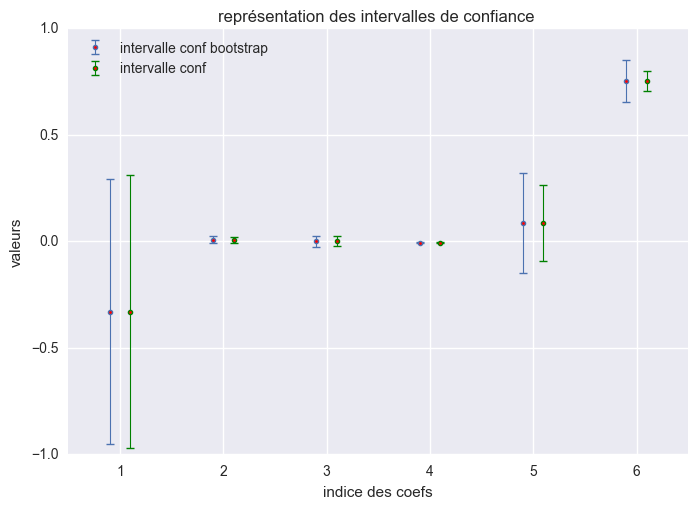

In [9]:
plt.figure(7)

x = np.array([1, 2, 3, 4, 5, 6])
y = theta[0:6] 
e = np.array([abs(intervalleBootCoef(0)[0]-intervalleBootCoef(0)[1])/2\
              ,abs(intervalleBootCoef(1)[0]-intervalleBootCoef(1)[1])/2\
              ,abs(intervalleBootCoef(2)[0]-intervalleBootCoef(2)[1])/2\
              ,abs(intervalleBootCoef(3)[0]-intervalleBootCoef(3)[1])/2\
              ,abs(intervalleBootCoef(4)[0]-intervalleBootCoef(4)[1])/2\
              ,abs(intervalleBootCoef(5)[0]-intervalleBootCoef(5)[1])/2])

xe = np.array([abs(intervalleCoef(0)[0]-intervalleCoef(0)[1])/2\
              ,abs(intervalleCoef(1)[0]-intervalleCoef(1)[1])/2\
              ,abs(intervalleCoef(2)[0]-intervalleCoef(2)[1])/2\
              ,abs(intervalleCoef(3)[0]-intervalleCoef(3)[1])/2\
              ,abs(intervalleCoef(4)[0]-intervalleCoef(4)[1])/2\
              ,abs(intervalleCoef(5)[0]-intervalleCoef(5)[1])/2])


plt.errorbar(x-0.1, y, e, linestyle='None', marker='.', mfc='red', ms=6, mew=1, lw=0.8, label = "intervalle conf bootstrap")
plt.errorbar(x+0.1, y, xe, color ="green", linestyle='None', marker='.', mfc='red', ms=6, mew=1, lw=0.8, label = "intervalle conf")

plt.xlabel("indice des coefs")
plt.ylabel("valeurs")
plt.title("représentation des intervalles de confiance ")
plt.axis([0.5, 6.5, -1, 1])
plt.legend(loc = "best")


plt.show()